In [1]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns           # for working with maps
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import tensorflow as ts 
from  tensorflow import keras
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

2024-04-12 21:34:07.631919: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 21:34:07.632017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 21:34:07.757829: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Dataset
dataset="/kaggle/input/new-plant-diseases-dataset"
# Training Data
train_data="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
# Validation Data
valid_data="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
# Testing Data
test_data="/kaggle/input/new-plant-diseases-dataset/test/test"

In [3]:
# Retrieve the list of diseases from the train_data and print it
diseases=os.listdir(train_data)
print(diseases)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [4]:
# Print the number of classes or diseases present in the train_data
print("Number of classes : ",len(diseases))

Number of classes :  38


In [5]:
# Count the number of images per class in the training data directory and display the counts in a DataFrame
nums_train={}
nums_valid={}
for disease in diseases:
    nums_train[disease]=len(os.listdir(train_data+'/'+disease))
    nums_valid[disease]=len(os.listdir(valid_data+'/'+disease))
image_class_count_train=pd.DataFrame(nums_train.values(),index=nums_train.keys(),columns=['No. of images'])
print('Training data images count per class : ',)
print(image_class_count_train)

Training data images count per class : 
                                                    No. of images
Tomato___Late_blight                                         1851
Tomato___healthy                                             1926
Grape___healthy                                              1692
Orange___Haunglongbing_(Citrus_greening)                     2010
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Potato___healthy                                             1824
Corn_(maize)___Northern_Leaf_Blight                          1908
Tomato___Early_blight                                        1920
Tomato___Septoria_leaf_spot                                  1745
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Strawberry___Leaf_scorch                                     1774
Peach___healthy                                              1728
Apple___Apple_scab                  

In [6]:
# Count the number of images per class in the validation data directory and display the counts in a DataFrame
image_class_count_valid=pd.DataFrame(nums_valid.values(),index=nums_valid.keys(),columns=['No. of images'])
print('Validation data images count per class : ',)
print(image_class_count_valid)

Validation data images count per class : 
                                                    No. of images
Tomato___Late_blight                                          463
Tomato___healthy                                              481
Grape___healthy                                               423
Orange___Haunglongbing_(Citrus_greening)                      503
Soybean___healthy                                             505
Squash___Powdery_mildew                                       434
Potato___healthy                                              456
Corn_(maize)___Northern_Leaf_Blight                           477
Tomato___Early_blight                                         480
Tomato___Septoria_leaf_spot                                   436
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Strawberry___Leaf_scorch                                      444
Peach___healthy                                               432
Apple___Apple_scab                

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'Training data images count per class'}, xlabel='Number of images', ylabel='Classes'>

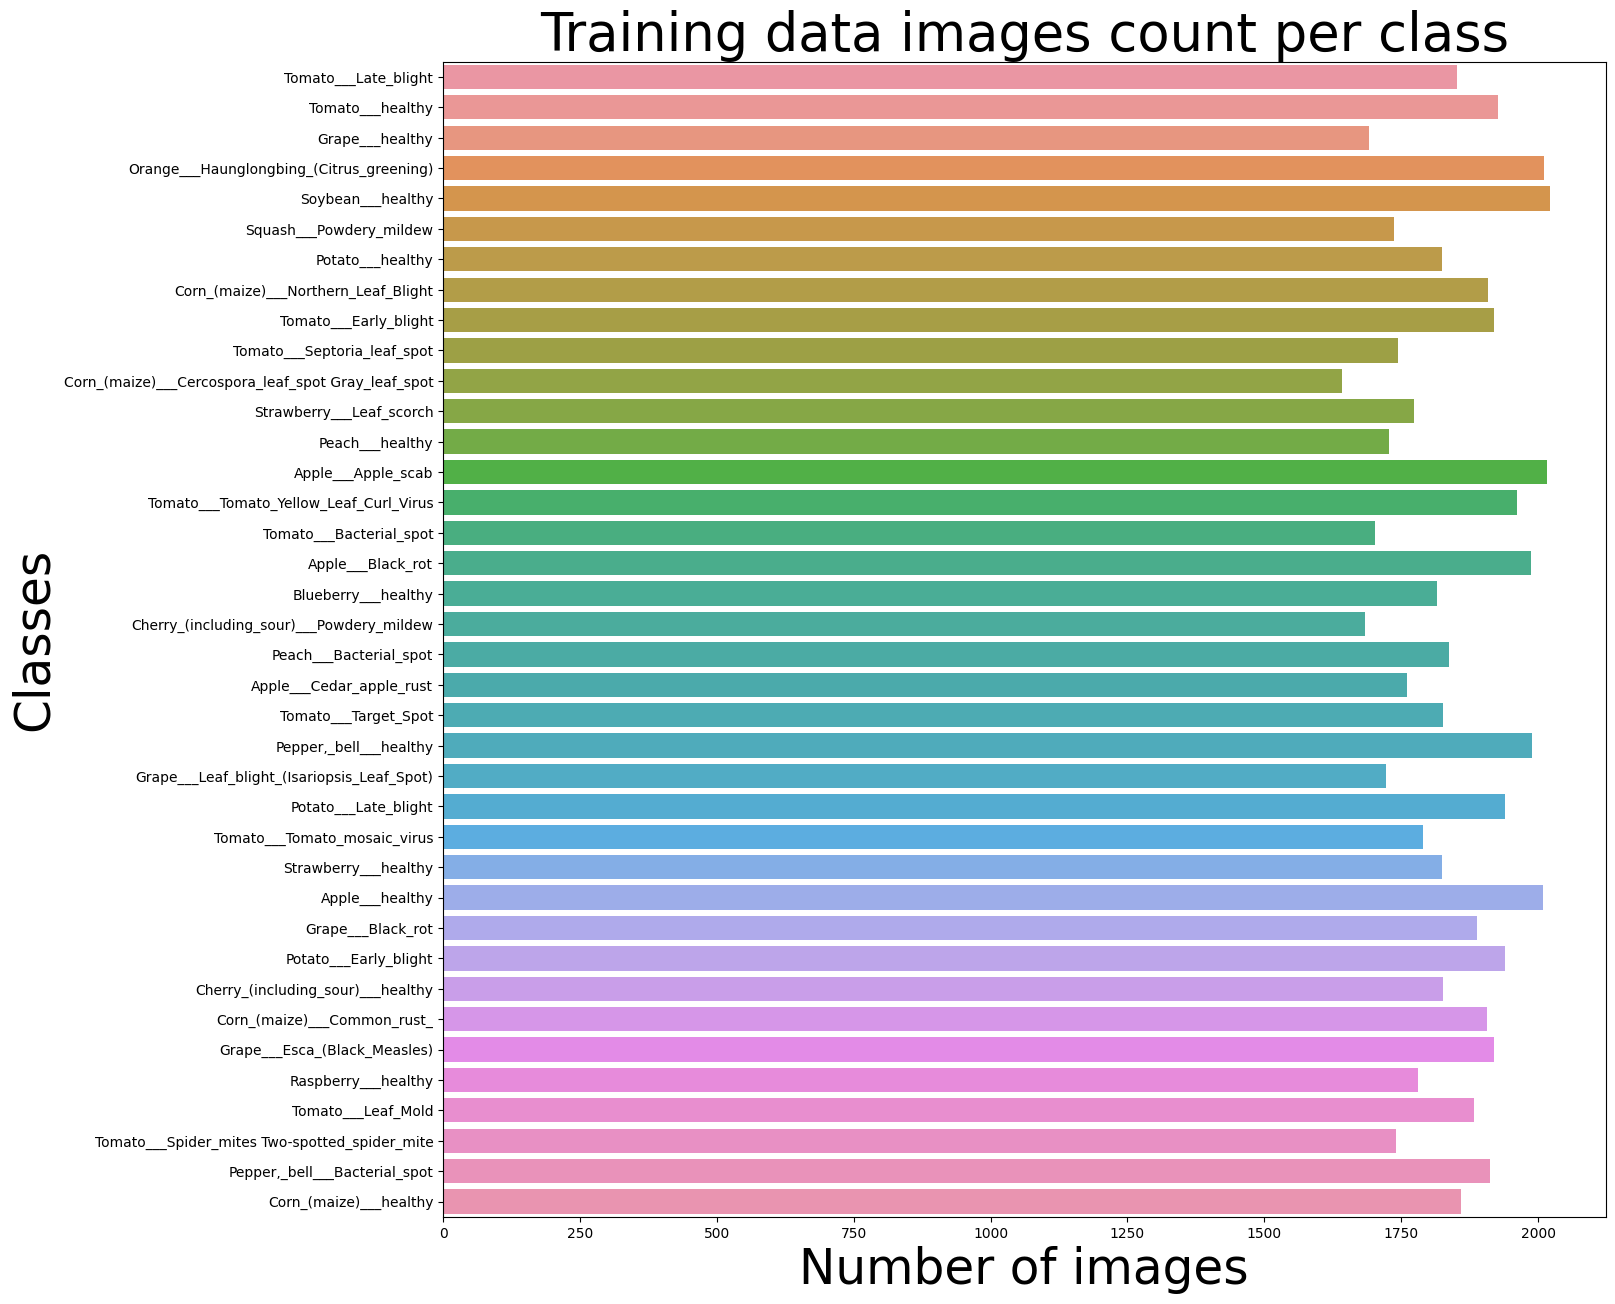

In [7]:
# Create a bar plot showing the count of training images per class
plt.figure(figsize=(15,15))
plt.title("Training data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

keys=list(nums_train.keys())
vals=list(nums_train.values())
sns.barplot(y=keys,x=vals)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'Validation data images count per class'}, xlabel='Number of images', ylabel='Classes'>

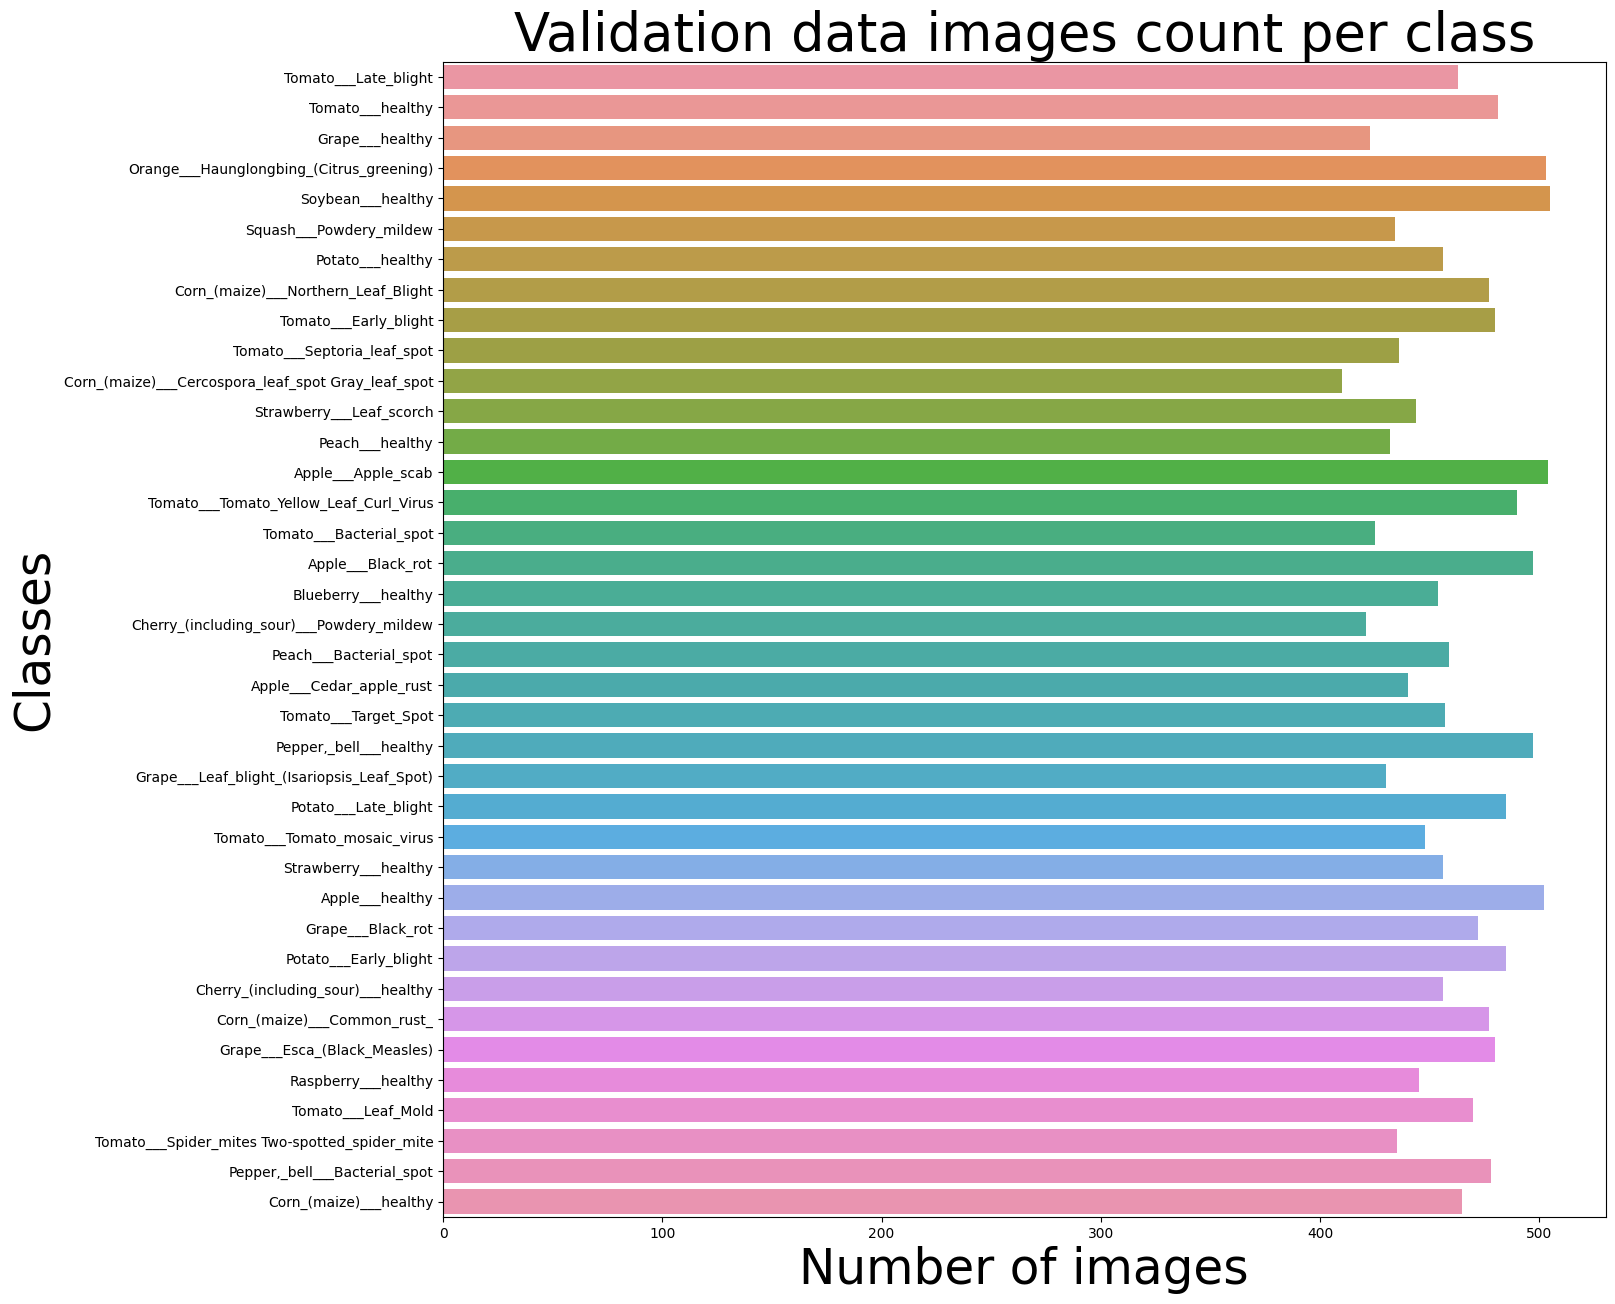

In [8]:
# Create a bar plot showing the count of validation images per class
plt.figure(figsize=(15,15))
plt.title("Validation data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

keys=list(nums_valid.keys())
vals=list(nums_valid.values())
sns.barplot(y=keys,x=vals)

In [9]:
#  Calculate the total number of images for training
total_train=0
for value in nums_train.values():
    total_train+=value
print("Total number of images for training : ", total_train)

Total number of images for training :  70295


In [10]:
#  Calculate the total number of images for validation
total_valid=0
for value in nums_valid.values():
    total_valid+=value
print("Total number of images for validation : ", total_valid)

Total number of images for validation :  17572


In [11]:
# Extract unique plant names and unique disease names from the list of diseases.
plants_unique=[]
diseases_unique=[]
for i in diseases:
    if(i.split('__'))[0] not in plants_unique:
        plants_unique.append(i.split('__')[0])
    if(i.split('___'))[1] != 'healthy':
        diseases_unique.append(i.split('___')[1])

In [12]:
# Print the unique plant names extracted from the list of diseases and display the total number of unique plant names
print('Plants : ', plants_unique)
print('-'*100)
print('Number of plants : ', len(plants_unique))

Plants :  ['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']
----------------------------------------------------------------------------------------------------
Number of plants :  14


In [13]:
# Print the unique plant diseases extracted from the list of diseases and display the total number of unique plant diseases
print('Diseases : ', diseases_unique)
print('-'*100)
print('Number of diseases : ', len(diseases_unique))

Diseases :  ['Late_blight', 'Haunglongbing_(Citrus_greening)', 'Powdery_mildew', 'Northern_Leaf_Blight', 'Early_blight', 'Septoria_leaf_spot', 'Cercospora_leaf_spot Gray_leaf_spot', 'Leaf_scorch', 'Apple_scab', 'Tomato_Yellow_Leaf_Curl_Virus', 'Bacterial_spot', 'Black_rot', 'Powdery_mildew', 'Bacterial_spot', 'Cedar_apple_rust', 'Target_Spot', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Late_blight', 'Tomato_mosaic_virus', 'Black_rot', 'Early_blight', 'Common_rust_', 'Esca_(Black_Measles)', 'Leaf_Mold', 'Spider_mites Two-spotted_spider_mite', 'Bacterial_spot']
----------------------------------------------------------------------------------------------------
Number of diseases :  26


In [14]:
# Create a rescaling layer in a Keras model
rescale=keras.layers.Rescaling(scale=1.0/255)

In [15]:
# Create TensorFlow tf.data.Dataset objects from image directories for training and validation data in Keras
# Images are loaded with the specified image size of (256, 256), and the function image_dataset_from_directory assigns labels based on subdirectory names
training_data =keras.utils.image_dataset_from_directory(train_data , image_size=(224, 224),shuffle=True)
validation_data = keras.utils.image_dataset_from_directory(valid_data, image_size=(224, 224),shuffle=True)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [16]:
# Create generator objects for training and validation data by applying the rescaling layer to the images
train_gen = training_data.map(lambda image,label:(rescale(image),label))
valid_gen  = validation_data.map(lambda image,label:(rescale(image),label))

In [17]:
class_labs = training_data.class_names
class_labs

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [18]:
# Create the CNN model
model = Sequential()

# Convolutional layers with ReLU activation and max pooling
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# Batch normalization and dropout for regularization
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Dense layers with ReLU activation, dropout, and L1/L2 regularization
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

# Compile the model with optimizer, loss, metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    11,075,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,146,502 (42.52 MB)

 Trainable params: 11,145,542 (42.52 MB)

 Non-trainable params: 960 (3.75 KB)

In [19]:
# Train the Keras model using a generator for the training and validation data
early_stopping = EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_gen, validation_data=valid_gen, epochs = 16,callbacks=[early_stopping])

Epoch 1/16
   3/2197 ━━━━━━━━━━━━━━━━━━━━ 1:59 54ms/step - accuracy: 0.0347 - loss: 4.9834 

I0000 00:00:1712957739.223534      93 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 196s 82ms/step - accuracy: 0.5352 - loss: 1.6748 - val_accuracy: 0.7107 - val_loss: 1.0140
Epoch 2/16
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.7702 - loss: 0.7440 - val_accuracy: 0.6856 - val_loss: 1.0766
Epoch 3/16
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 0.8164 - loss: 0.5910 - val_accuracy: 0.8771 - val_loss: 0.3992
Epoch 4/16
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.8497 - loss: 0.4798 - val_accuracy: 0.7736 - val_loss: 0.8078
Epoch 5/16
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.8732 - loss: 0.3977 - val_accuracy: 0.8550 - val_loss: 0.4747
Epoch 6/16
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.8843 - loss: 0.3555 - val_accuracy: 0.8892 - val_loss: 0.3571
Epoch 7/16
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.8999 - loss: 0.3069 - val_accuracy: 0.9015 - val_loss: 0.2924
Epoch 8/16
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9077 - lo

<Axes: >

<Figure size 1000x1000 with 0 Axes>

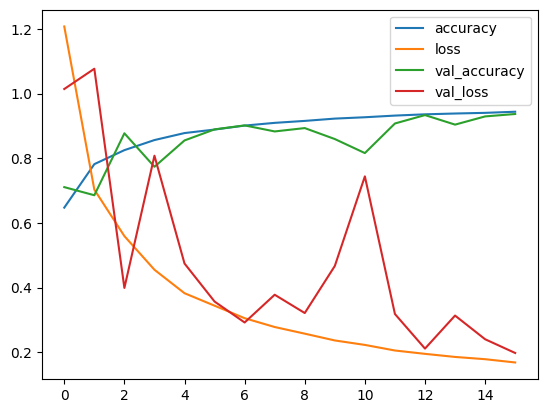

In [20]:
Grap_Data = pd.DataFrame(history.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

In [21]:
# Evaluate the model on the validation generator
loss, accuracy = model.evaluate(valid_gen)
# Print the accuracy
print("Validation Accuracy:", accuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9355 - loss: 0.2021
Validation Accuracy: 0.9367175102233887


In [22]:
model.save("plant_disease_model.h5")
from tensorflow.keras.models import load_model
cnn_model = load_model("/kaggle/working/plant_disease_model.h5")
for layer in cnn_model.layers[:7]:
        layer.trainable = False
cnn_model.save('plant_disease_model_v2.h5')

/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


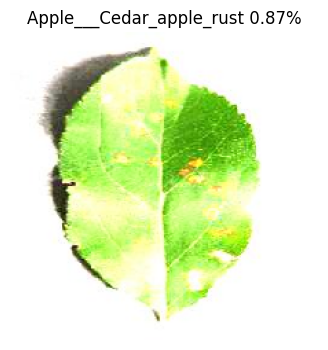

/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


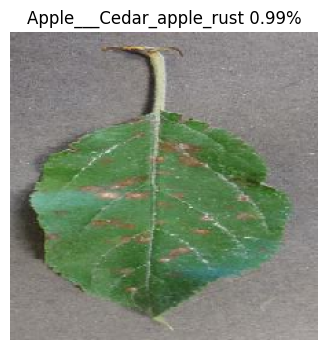

/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust3.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


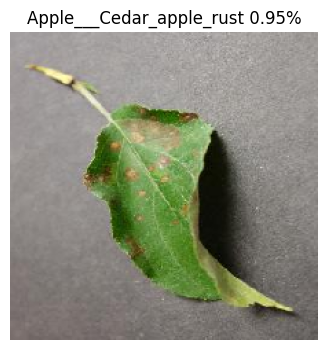

/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust4.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


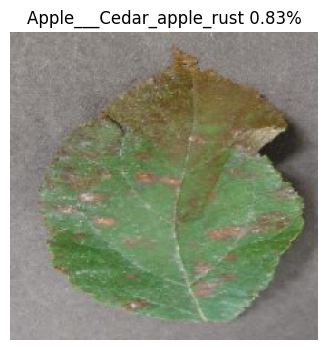

/kaggle/input/new-plant-diseases-dataset/test/test/AppleScab1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


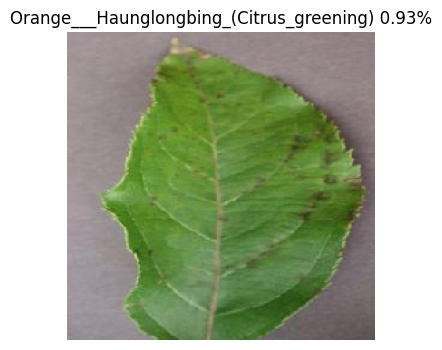

/kaggle/input/new-plant-diseases-dataset/test/test/AppleScab2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


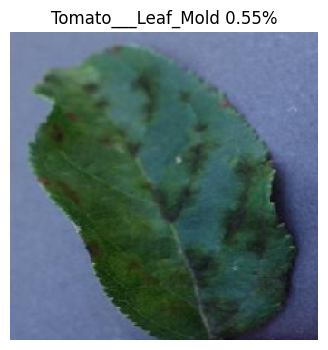

/kaggle/input/new-plant-diseases-dataset/test/test/AppleScab3.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


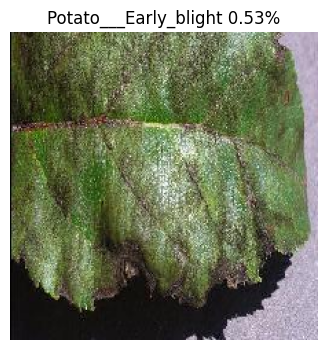

/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


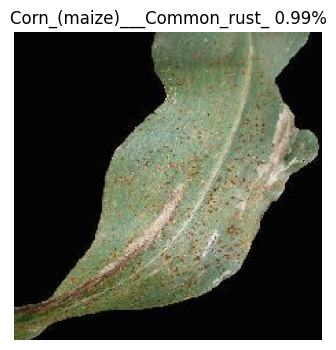

/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


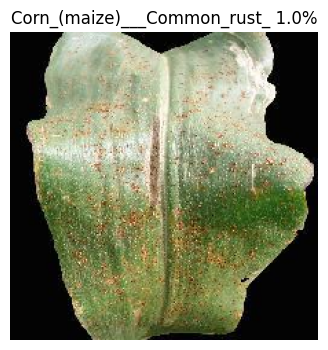

/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust3.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


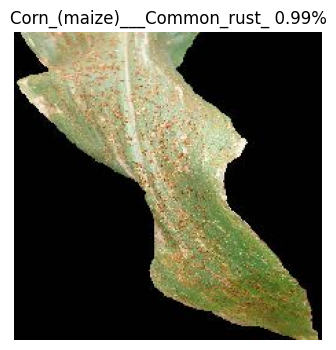

/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


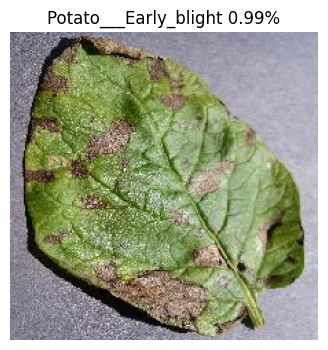

/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


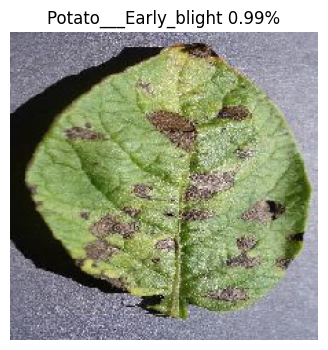

/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight3.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


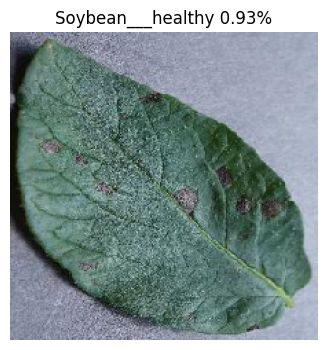

/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight4.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


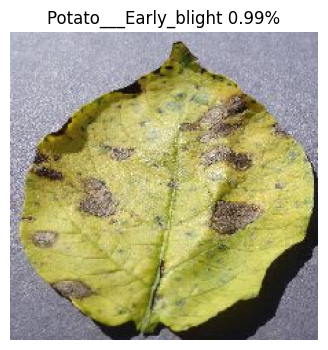

/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight5.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


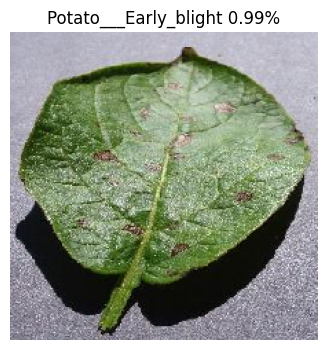

/kaggle/input/new-plant-diseases-dataset/test/test/PotatoHealthy1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


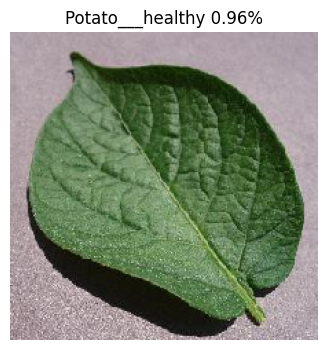

/kaggle/input/new-plant-diseases-dataset/test/test/PotatoHealthy2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


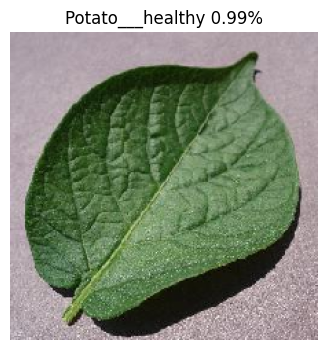

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


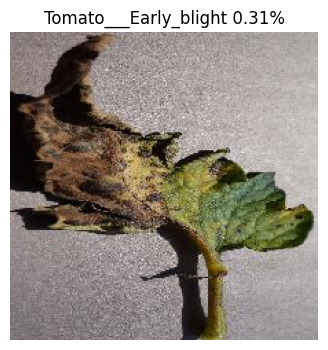

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


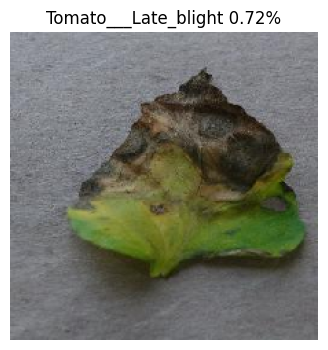

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight3.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


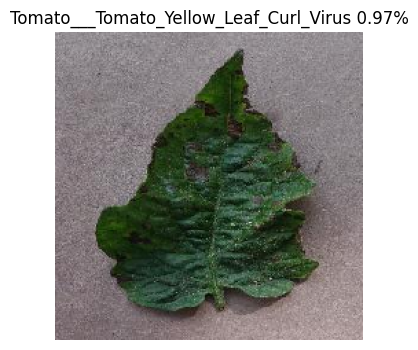

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight4.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


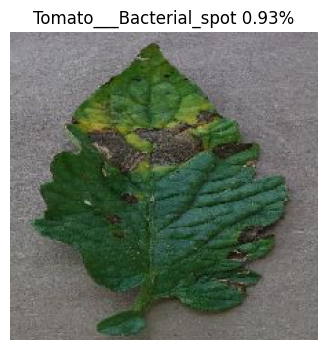

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight5.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


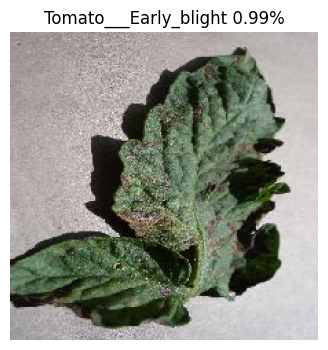

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight6.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


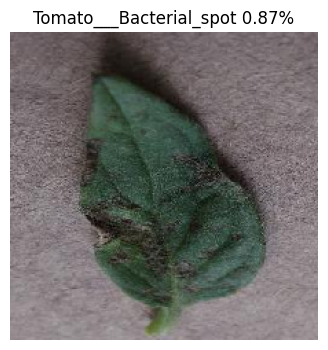

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoHealthy1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


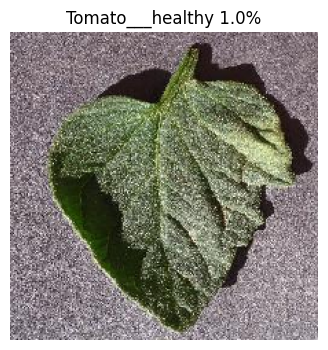

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoHealthy2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


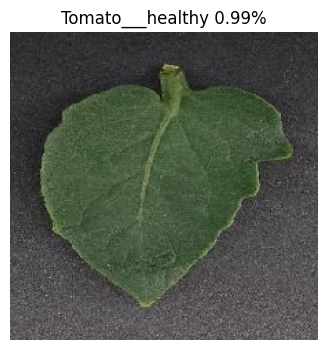

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoHealthy3.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


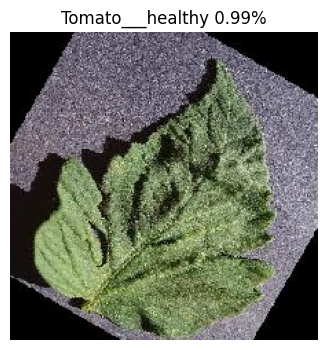

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoHealthy4.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


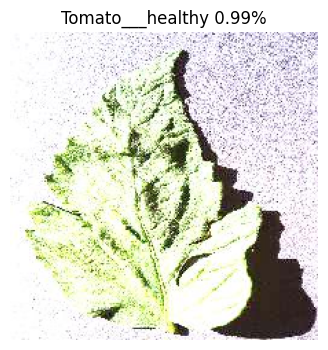

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


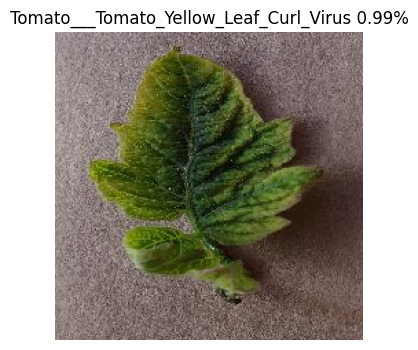

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


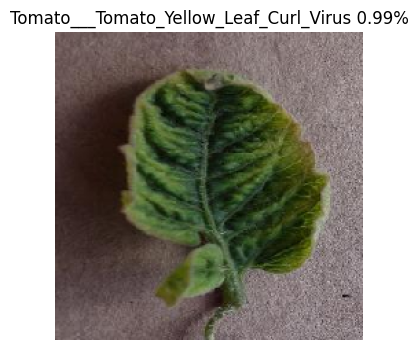

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus3.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


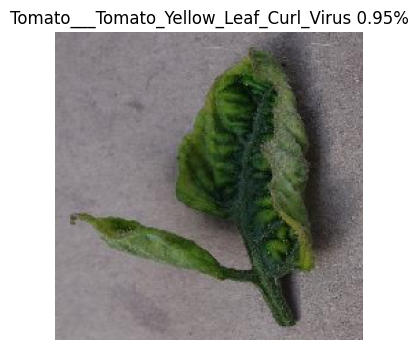

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus4.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


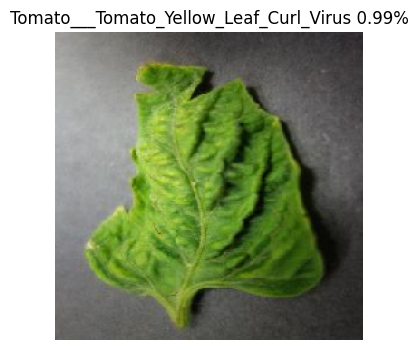

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus5.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


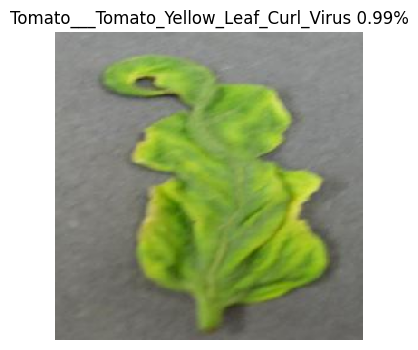

/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus6.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


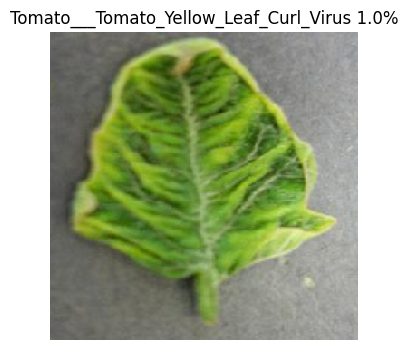

In [23]:
# predicting an image
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
files = [os.path.join(test_data,p) for p in sorted(os.listdir(test_data))]
for i in range(0,33):
    image_path = files[i]
    print(image_path)
    new_img =keras.utils.load_img(image_path, target_size=(224, 224))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = cnn_model.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = class_labs[index]
    #ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()